# Traffic Tickets Issued In The Last 4 Years in the State of New York

## This dataset is from data.gov that holds 11 columns and 13,179,082 rows. It contains The violation charge code, description,year,month,day of week, age,gender, state of license, police agency, court and source.  


## I have taken this data, cleaned it,  extracted useful data and recorded it at the bottom in the results section.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
df = pd.read_csv("Traffic_Tickets_Issued__Four_Year_Window.csv")

**Check to see if there is any missing data:

### Cleaning Data

In [19]:
df.isnull().sum() #running isnull to see the total count of missing values in each column.

Violation Charged Code    0
Violation Description     0
Violation Year            0
Violation Month           0
Violation Day of Week     0
Age at Violation          0
Gender                    0
State of License          0
Police Agency             0
Court                     0
Source                    0
dtype: int64

The data seems pretty clean. Only missing one column(Age at Violation) with 207,820 missing values. So i will replace those values with the average or mean of the data.

In [20]:
df['Age at Violation'].fillna(int(df['Age at Violation'].mean()), inplace=True)

In [21]:
df.isnull().sum()

Violation Charged Code    0
Violation Description     0
Violation Year            0
Violation Month           0
Violation Day of Week     0
Age at Violation          0
Gender                    0
State of License          0
Police Agency             0
Court                     0
Source                    0
dtype: int64

After filing the missing data with the average age, i ran the isnull function and we can now see there is no missing data from our dataset.

### Extracting Information

**Sum of each violation from greatest to least:

In [8]:
df['Violation Description'].value_counts(ascending=False)

SPEED IN ZONE                1322508
DISOBEYED TRAFFIC DEVICE      927214
UNLICENSED OPERATOR           656540
SPEED OVER 55 ZONE            611532
UNINSPECTED MOTOR VEHICLE     611482
                              ...   
NO DOT OMNIBUS INSP                1
UNAUTH TOWING - TWY                1
IMPROPER SALE/JUNK CAR             1
OVERLOADED PASS VEH                1
LITTERING ON THRUWAY               1
Name: Violation Description, Length: 910, dtype: int64

Here we see the most ticketed violation from this dataset is speeding in a Zone in the last 4 years.

**Number of Violations each month:

In [9]:
violationsPerMonth = df.groupby('Violation Month')\
  .agg({'Violation Month': 'count'}) 

,Violation Month
Violation Month,
1,1245586
2,1170458
3,1166519
4,1000999
5,1165321
6,1072133
7,1080568
8,1126886
9,1102159


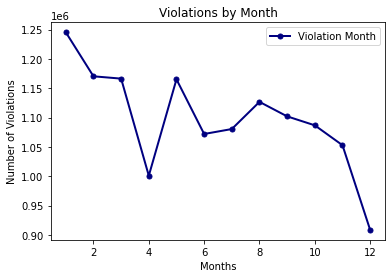

In [13]:
violationsPerMonth = df.groupby('Violation Month')\
  .agg({'Violation Month': 'count'}) 

ax = violationsPerMonth.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Violations by Month', label='Number of Violations')
ax.set_xlabel("Months")
ax.set_ylabel("Number of Violations")

plt.show()

December has the least amount of violations while January has the most.

**Age Violations:

In [16]:
df['Age at Violation'].value_counts().head(10) # top 10 in age group with most tickets.

37.0    495127
24.0    430205
25.0    428798
26.0    427193
23.0    426092
27.0    424706
28.0    418032
22.0    417967
21.0    405955
29.0    399360
Name: Age at Violation, dtype: int64

In [17]:
df['Age at Violation'].value_counts().tail(10) # bottom 10 in age with least amount of tickets

86.0    2039
87.0    1606
88.0    1231
89.0    1039
90.0     731
91.0     494
92.0     365
93.0     229
94.0     182
95.0     115
Name: Age at Violation, dtype: int64

# Results:

**Top 3 tickets given in the last 4 years in the state of New York are:

* 1. SPEED IN ZONE                1,322,508
* 2. DISOBEYED TRAFFIC DEVICE      927,214
* 3. UNLICENSED OPERATOR           656,540


**Month with most tickets in the last 4 years:
* December


**Month with last amount of tickets in 4 years:
* January 


**Top 5 age group with most tickets:
* 1. 37 years old:    495,127
* 2. 24 years old:    430,205
* 3. 25 years old:    428,798
* 4. 26 years old:    427,193
* 5. 23 years old:    426,092


**Bottom 5 age group with least amount of tickets:
* 1. 95 years old:    115
* 2. 94 years old:    182
* 3. 93 years old:    229
* 4. 92 years old:    365
* 5. 91 years old:    494



